# International Matches

## Opis projekta i podaci

Za potrebe ovog projekta iskorišteni su podaci dostupni na sljedećem linku: https://www.kaggle.com/datasets/brenda89/fifa-world-cup-2022.
U sklopu navedenog skupa podataka moguće je pronaći sve informacije o internacionalnim utakmicama odigranih od 08.08.1993. godine. Podaci se sastoje od sljedećih stupaca:

| Stupac   | Opis  |
|----------|:-------------|
| `date`           | Datum kada je utakmica odigrana |
| `home_team`            | Domaća momčad. |
| `away_team`      | Gostujuća momčad. |
| `home_team_continent`      | Kontinent s kojeg dolazi domaća momčad. |
| `away_team_continent`            | Kontinent s kojeg dolazi gostujuća momčad |
| `home_team_fifa_rank`     | FIFA ranking domaće momčadi. |
| `away_team_fifa_rank`            | FIFA ranking gostujuće momčadi. |
| `home_team_total_fifa_points`       | Zbroj FIFA bodova svih igrača domaće momčadi.  |
| `away_team_total_fifa_points` | Zbroj FIFA bodova svih igrača gostujuće momčadi. |
| `home_team_score` | Broj golova domaće momčadi. |
| `away_team_score` | Broj golova gostujuće momčadi |
| `tournament` | Natjecanje u sklopu kojeg je utakmica odigrana. |
| `city` | Grad u kojem je utakmica odigrana. |
| `country` | Država u kojoj je utakmica odigrana. |
| `neutral_location` | Je li utakmica odigrana na neutralnoj lokaciji |
| `shoot_out` | Je li utakmica završila izvođenjem jedanaesteraca? |
| `home_team_result` | Ishod utakmice za domaću momčad. |
| `home_team_goalkeeper_score` | FIFA ranking golmana domaće momčadi. |
| `away_team_goalkeeper_score` | FIFA ranking golmana gostujuće momčadi. |
| `home_team_mean_defense_score` | Prosjek FIFA bodova defenzivnih igrača domaće momčadi. |
| `home_team_mean_offense_score` | Prosjek FIFA bodova ofenzivnih igrača domaće momčadi. |
| `home_team_mean_midfield_score` | Prosjek FIFA bodova veznih igrača domaće momčadi. |
| `away_team_mean_defense_score` | Prosjek FIFA bodova defenzivnih igrača gostujuće momčadi. |
| `away_team_mean_offense_score` | Prosjek FIFA bodova ofenzivnih igrača gostujuće momčadi. |
| `away_team_mean_midfield_score` | Prosjek FIFA bodova veznih igrača gostujuće momčadi. |

## Obrada

### Priprema podataka

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


matches_df = pd.read_csv("./international_matches.csv")

### Broj utakmica u drzavama

<AxesSubplot: xlabel='matches_played', ylabel='country'>

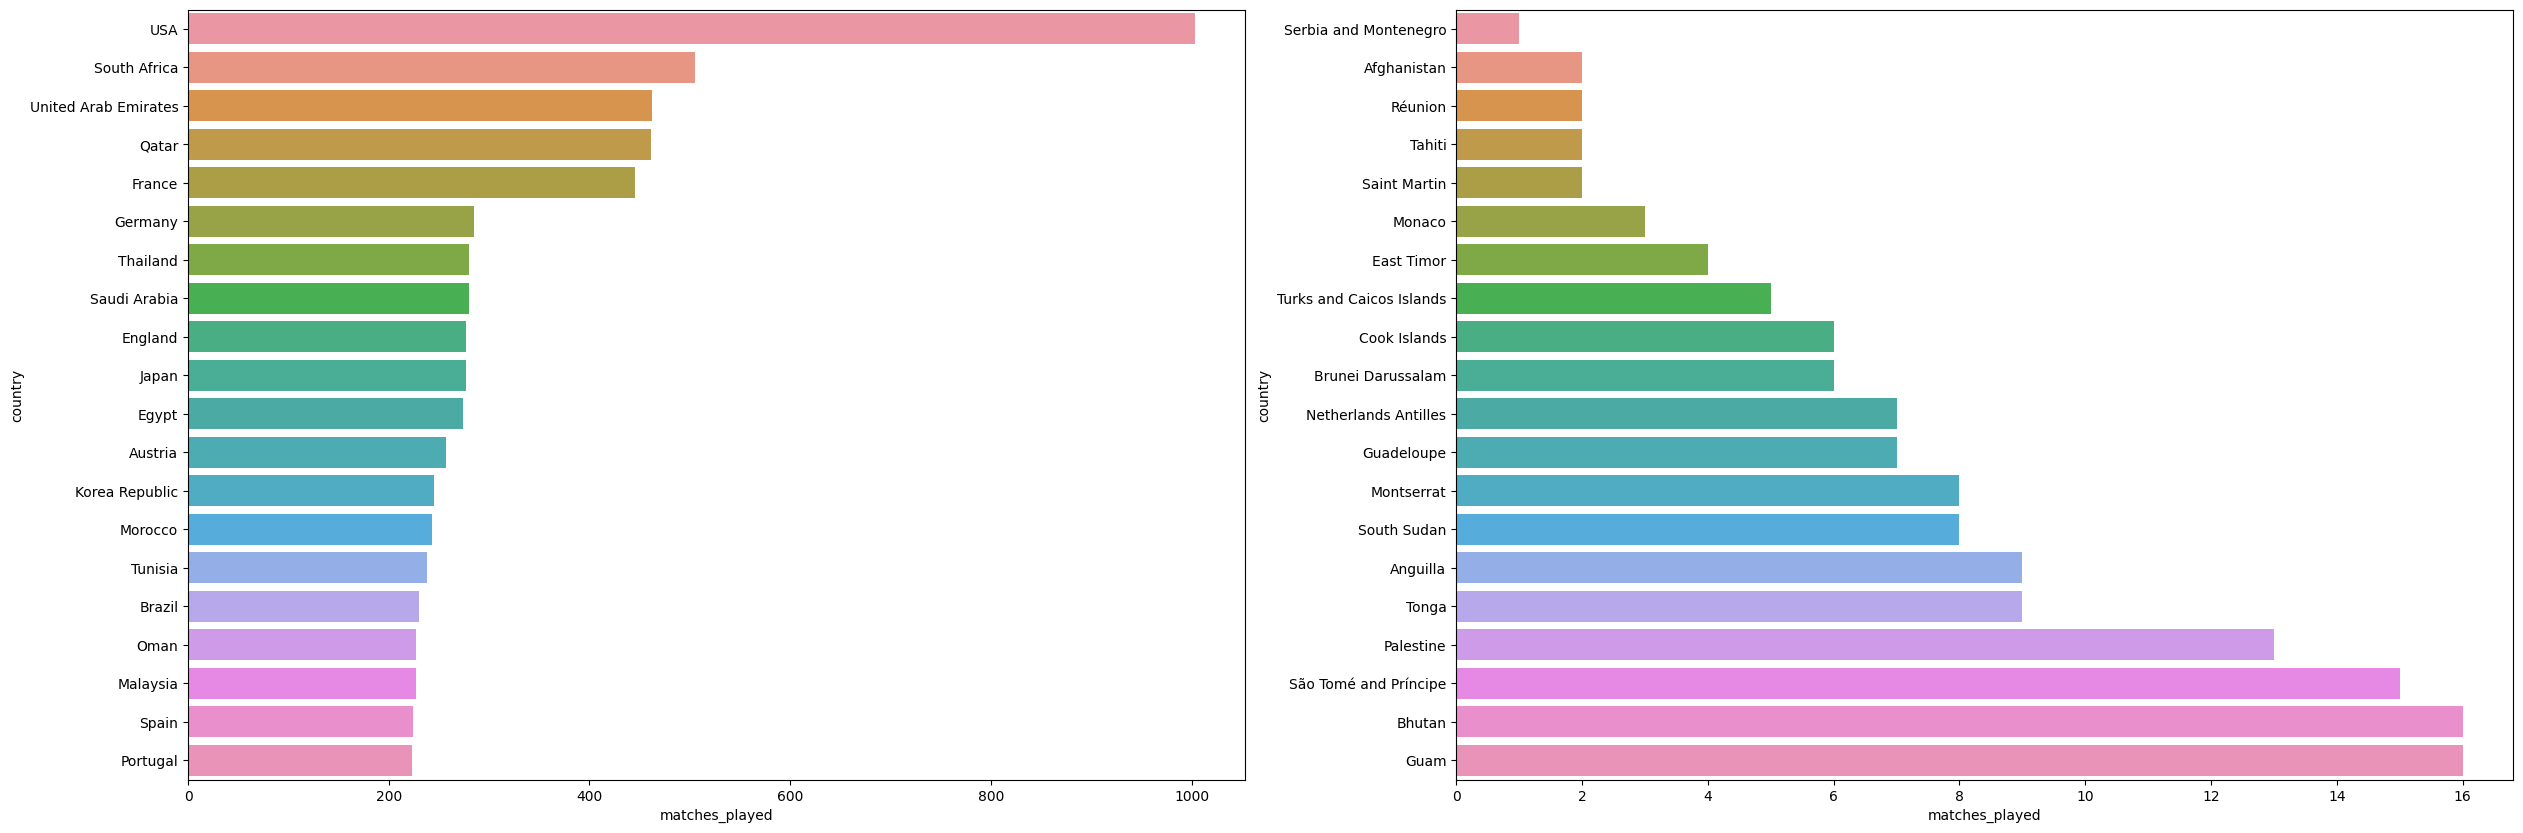

In [2]:
countries_df = matches_df.groupby(["country"]).size().reset_index(name='matches_played')
countries_with_most_games = countries_df.sort_values(by=['matches_played'], ascending=False).head(20)
countries_with_least_games = countries_df.sort_values(by=['matches_played']).head(20)
figure, axes = plt.subplots(1, 2, figsize=(30,10))
sns.barplot(data=countries_with_most_games, x="matches_played", y='country', orient="h", ax=axes[0])
sns.barplot(data=countries_with_least_games, x="matches_played", y="country", orient="h", ax=axes[1])

### Gradovi u kojima je odigrano najvise utakmica

<AxesSubplot: xlabel='count', ylabel='city'>

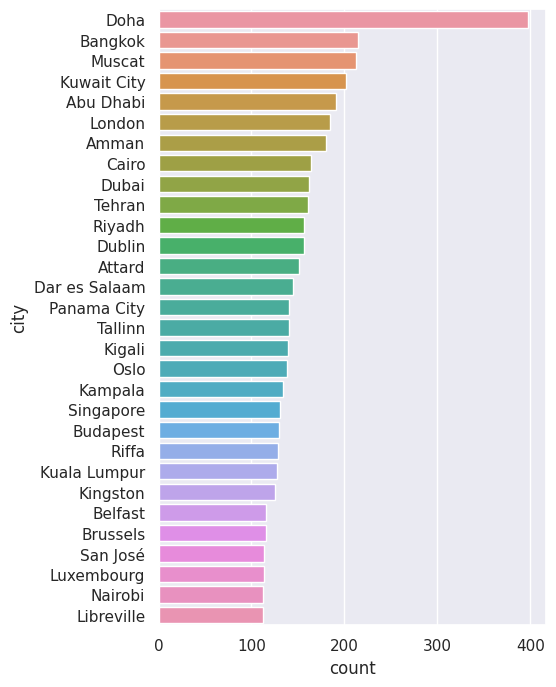

In [11]:
cities_df = matches_df.groupby(['city']).size().reset_index(name='count').sort_values("count", ascending=False).head(30)
sns.set(rc={'figure.figsize':(5,8)})
sns.barplot(cities_df, x='count', y='city', orient='h')

### Utakmice sa najvise golova

<AxesSubplot: xlabel='match_name', ylabel='total_score'>

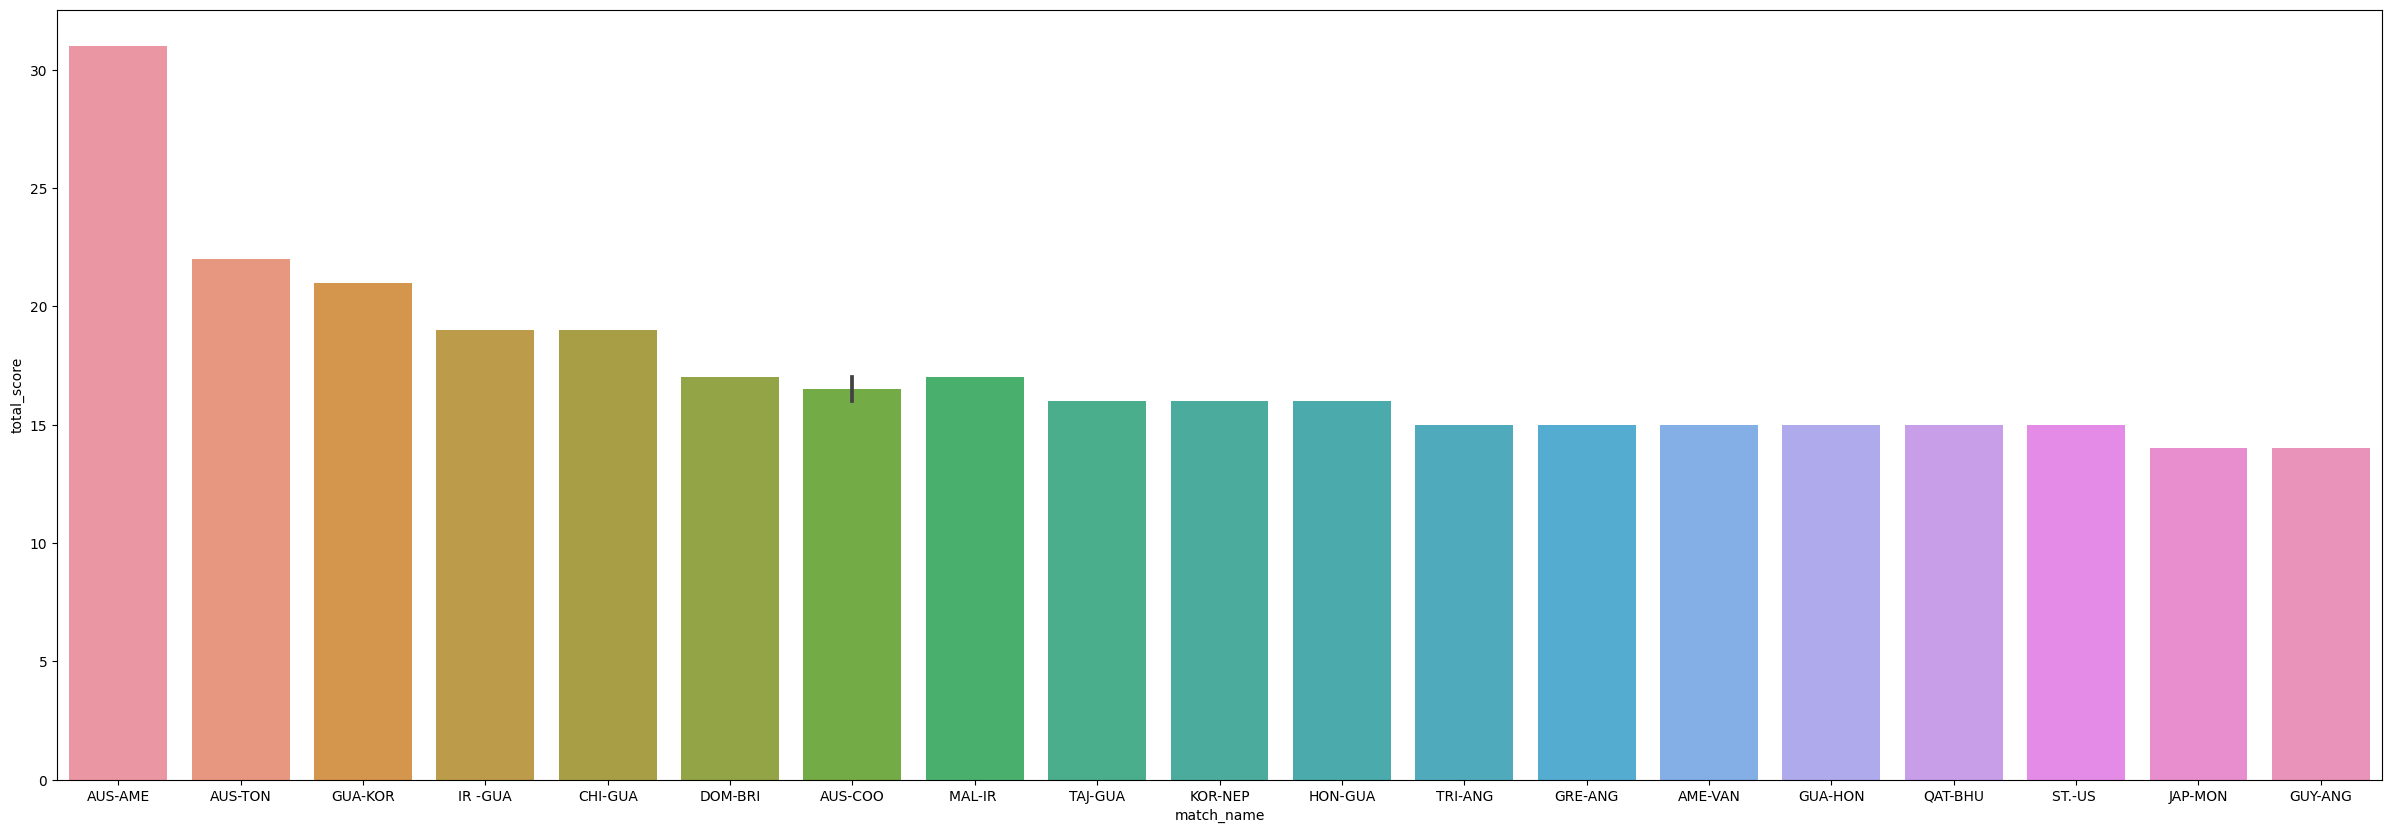

In [3]:
matches = matches_df
matches["total_score"] = matches_df["away_team_score"] + matches_df["home_team_score"]
matches_with_most_goals = matches.sort_values(by=["total_score"], ascending=False).head(20)
matches_with_most_goals["match_name"] = matches_with_most_goals['home_team'].apply(lambda x: x.upper()[0:3]) + "-" + matches_with_most_goals['away_team'].apply(lambda x: x.upper()[0:3])
figure, axes = plt.subplots(1, 1, figsize=(30,10))
sns.barplot(data=matches_with_most_goals, x="match_name", y="total_score")

### Drzave koje u prosjeku imaju najbolju obranu po FIFA ocjenama

<AxesSubplot: xlabel='mean_defense_score', ylabel='country'>

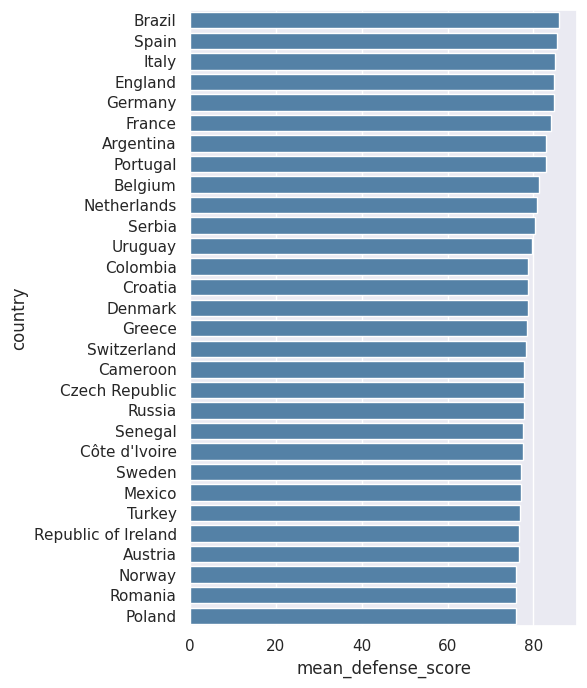

In [10]:
home_team_defense_mean_score = pd.DataFrame(matches_df[['home_team', 'home_team_mean_defense_score']].dropna().values, columns=['country', 'mean_defense_score'])
away_team_defense_mean_score = pd.DataFrame(matches_df[['away_team', 'away_team_mean_defense_score']].dropna().values, columns=['country', 'mean_defense_score'])
countries_defense_mean_score = pd.concat([home_team_defense_mean_score, away_team_defense_mean_score])
countries_defense_mean_score = countries_defense_mean_score.groupby(countries_defense_mean_score['country'], as_index=False).aggregate('mean').sort_values(by="mean_defense_score", ascending=False).head(30)
sns.set(rc={'figure.figsize':(5,8)})
sns.barplot(data=countries_defense_mean_score, y=countries_defense_mean_score['country'], x=countries_defense_mean_score['mean_defense_score'], orient='h', color="steelblue")

### Drzave koje su u jednoj utakmici zabile najvise golova

<AxesSubplot: xlabel='score', ylabel='match'>

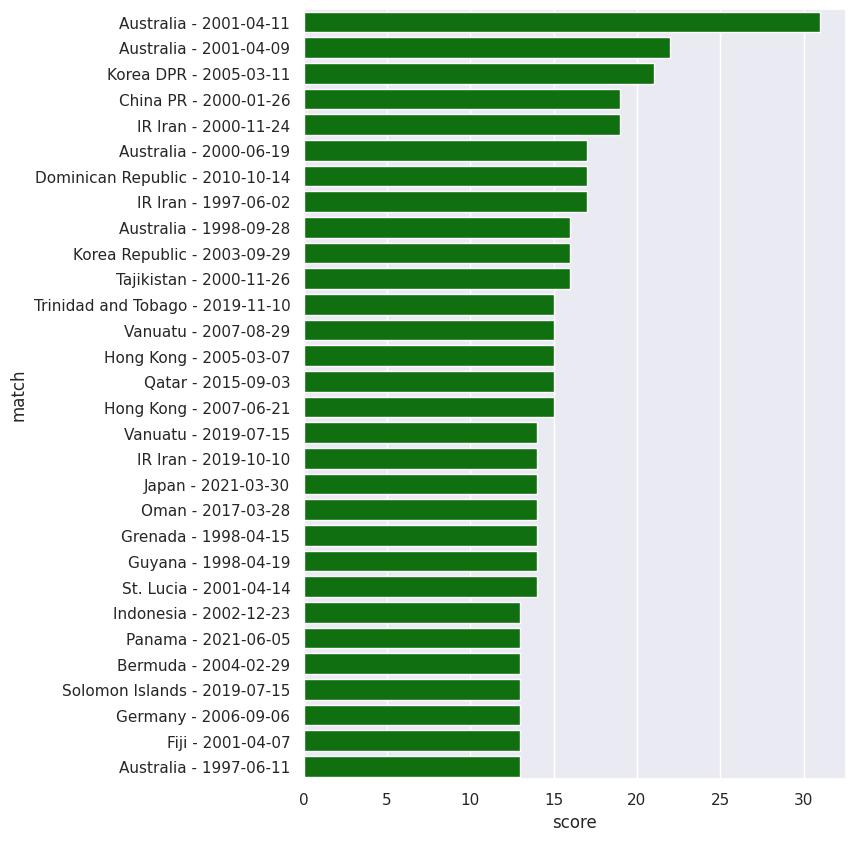

In [4]:
matches_goals_ho = matches_df[["home_team", "date", "home_team_score"]].rename(columns={"home_team_score": "score", "home_team": "team"})
matches_goals_aw = matches_df[["away_team", "date", "away_team_score"]].rename(columns={"away_team_score": "score", "away_team": "team"})
countries_most_goals = pd.DataFrame(pd.concat([matches_goals_ho, matches_goals_aw])).groupby(["team", "date"], as_index=False).aggregate("max").sort_values(by="score", ascending=False).head(30)
countries_most_goals["match"] = countries_most_goals["team"] + " - "  + countries_most_goals["date"]
sns.set(rc={'figure.figsize':(7,10)})
sns.barplot(data=countries_most_goals, y=countries_most_goals['match'], x=countries_most_goals['score'], orient='h', color="green")


### Drzave koje u prosjeku imaju najbolji red po FIFA ocjenama

<AxesSubplot: xlabel='goalkeeper_score', ylabel='country'>

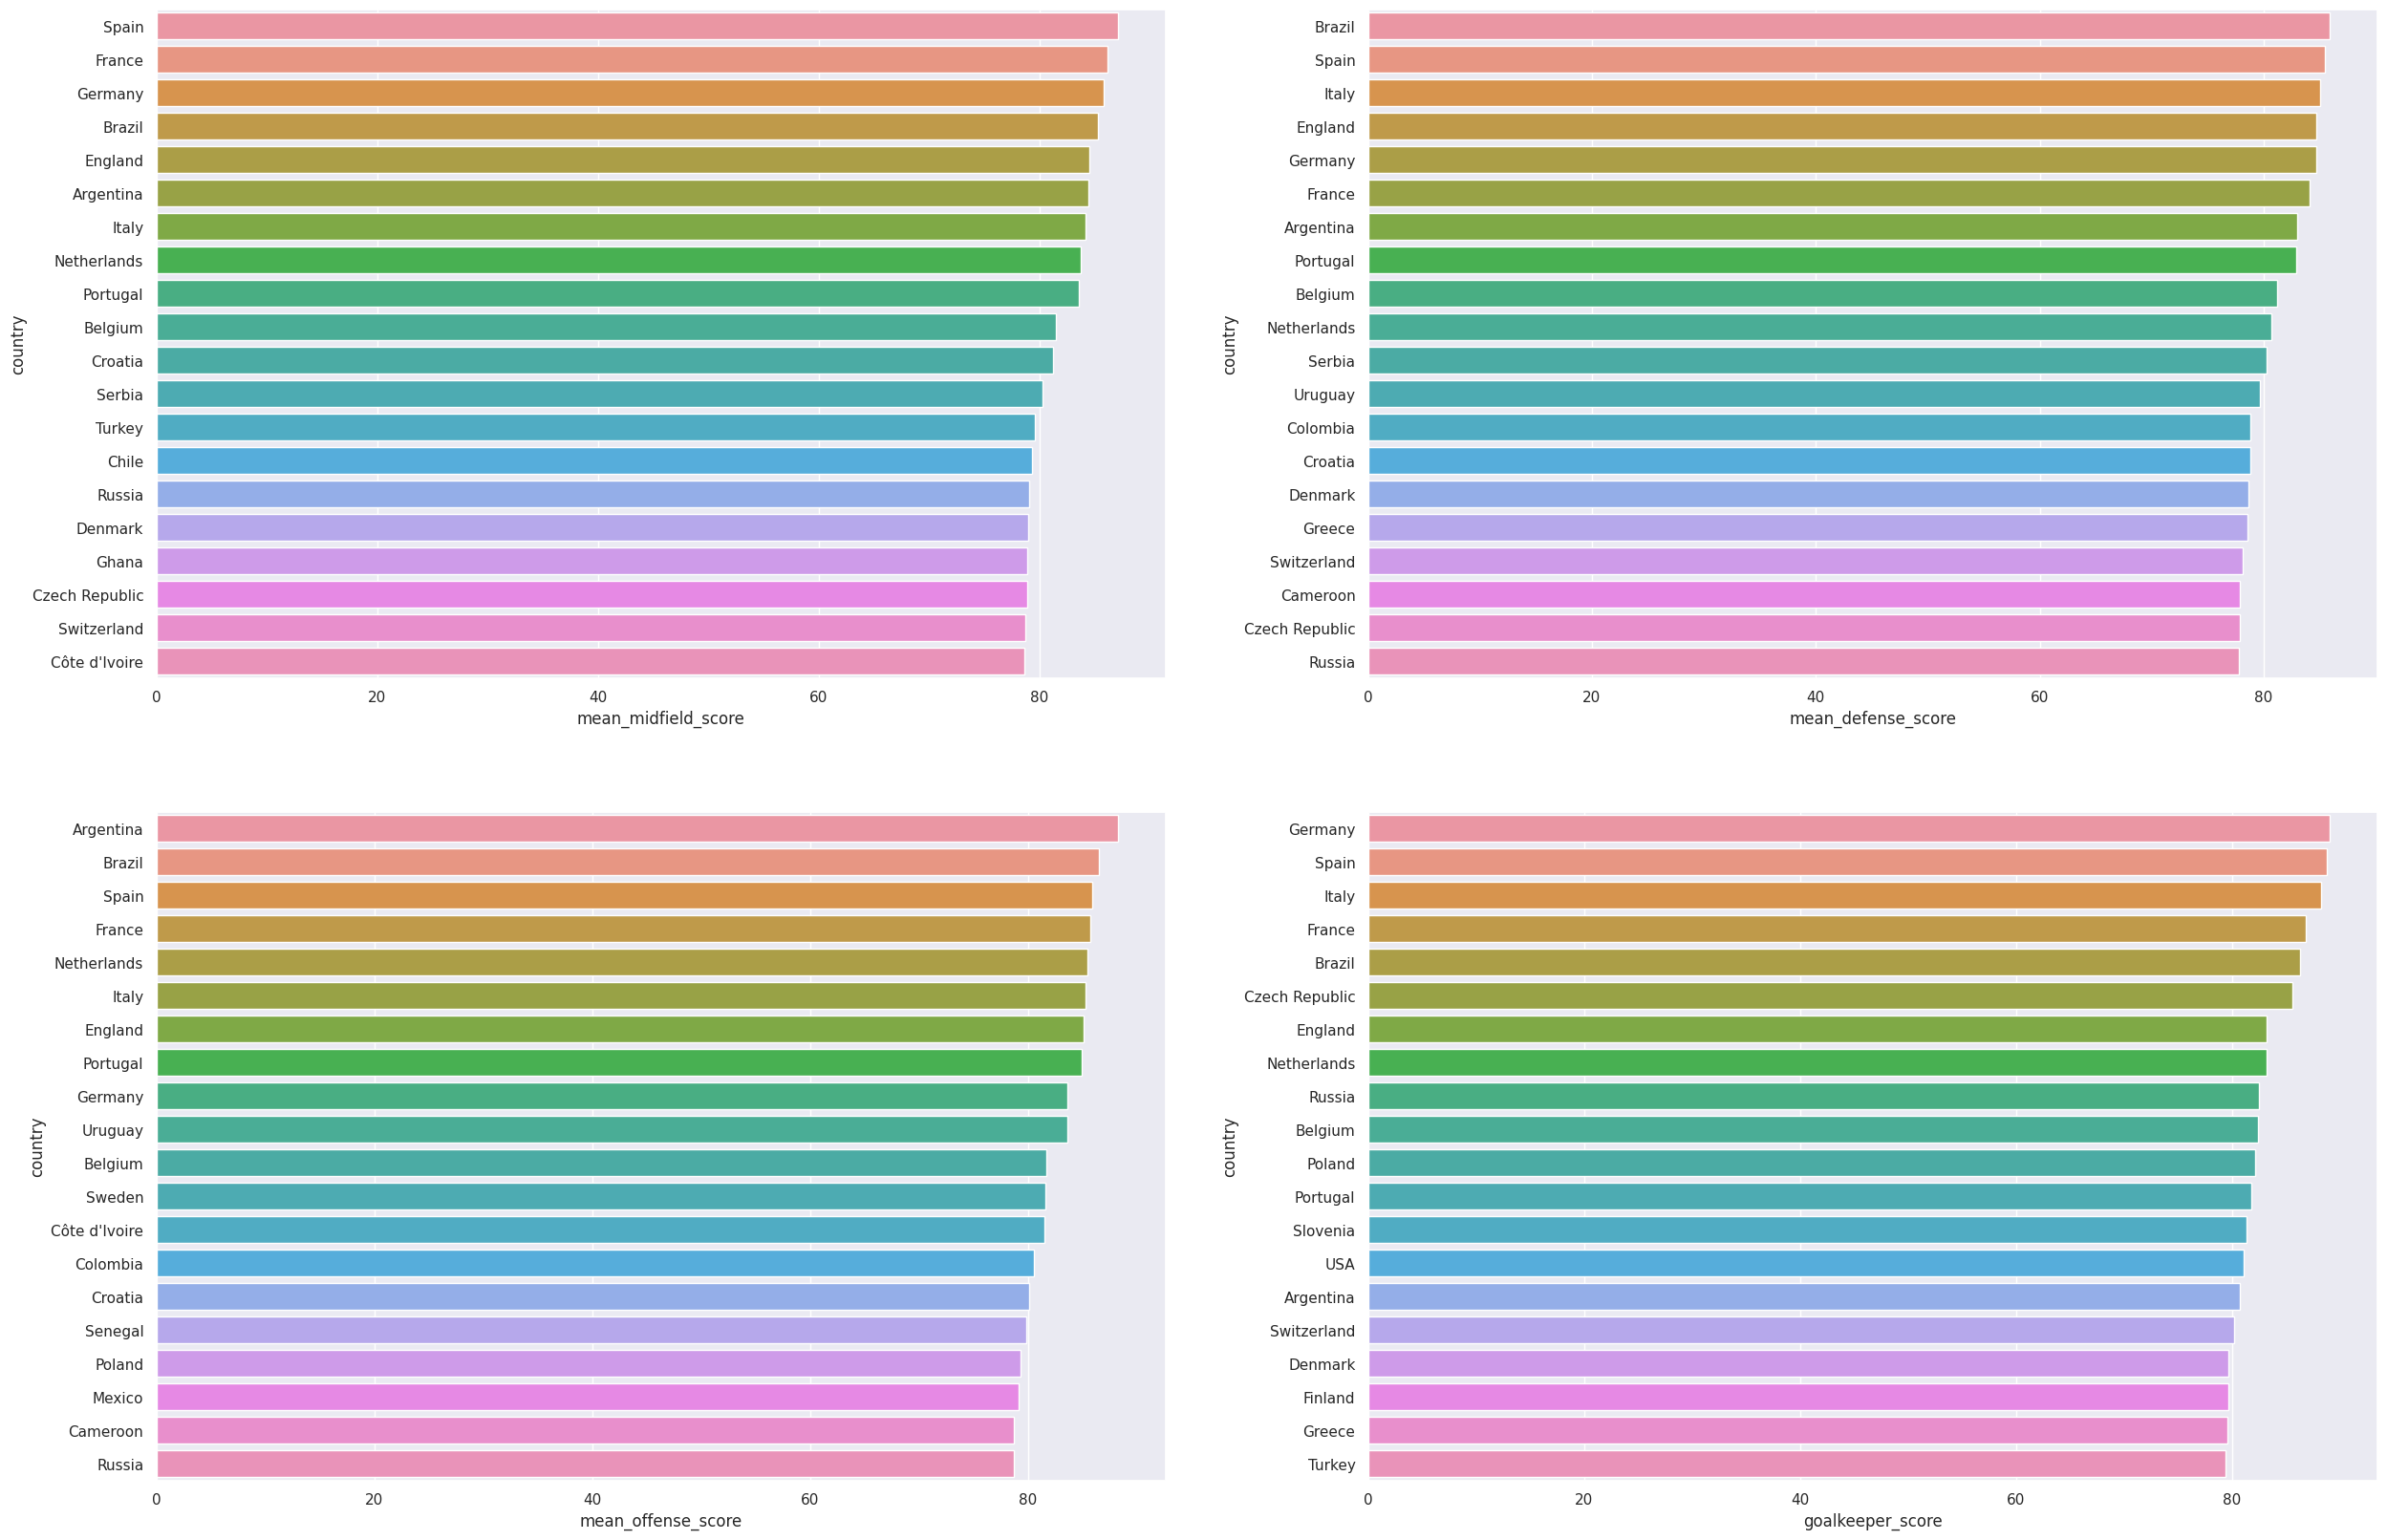

In [20]:
home_team_midfield_mean_score = pd.DataFrame(matches_df[['home_team', 'home_team_mean_midfield_score']].dropna().values, columns=['country', 'mean_midfield_score'])
away_team_midfield_mean_score = pd.DataFrame(matches_df[['away_team', 'away_team_mean_midfield_score']].dropna().values, columns=['country', 'mean_midfield_score'])
countries_midfield_mean_score = pd.concat([home_team_midfield_mean_score, away_team_midfield_mean_score])
countries_midfield_mean_score = countries_midfield_mean_score.groupby(countries_midfield_mean_score['country'], as_index=False).aggregate('mean').sort_values(by="mean_midfield_score", ascending=False).head(20)

home_team_defense_mean_score = pd.DataFrame(matches_df[['home_team', 'home_team_mean_defense_score']].dropna().values, columns=['country', 'mean_defense_score'])
away_team_defense_mean_score = pd.DataFrame(matches_df[['away_team', 'away_team_mean_defense_score']].dropna().values, columns=['country', 'mean_defense_score'])
countries_defense_mean_score = pd.concat([home_team_defense_mean_score, away_team_defense_mean_score])
countries_defense_mean_score = countries_defense_mean_score.groupby(countries_defense_mean_score['country'], as_index=False).aggregate('mean').sort_values(by="mean_defense_score", ascending=False).head(20)

home_team_offense_mean_score = pd.DataFrame(matches_df[['home_team', 'home_team_mean_offense_score']].dropna().values, columns=['country', 'mean_offense_score'])
away_team_offense_mean_score = pd.DataFrame(matches_df[['away_team', 'away_team_mean_offense_score']].dropna().values, columns=['country', 'mean_offense_score'])
countries_offense_mean_score = pd.concat([home_team_offense_mean_score, away_team_offense_mean_score])
countries_offense_mean_score = countries_offense_mean_score.groupby(countries_offense_mean_score['country'], as_index=False).aggregate('mean').sort_values(by="mean_offense_score", ascending=False).head(20)

home_team_goalkeeper_score = pd.DataFrame(matches_df[['home_team', 'home_team_goalkeeper_score']].dropna().values, columns=['country', 'goalkeeper_score'])
away_team_goalkeeper_score = pd.DataFrame(matches_df[['away_team', 'away_team_goalkeeper_score']].dropna().values, columns=['country', 'goalkeeper_score'])
countries_goalkeeper_score = pd.concat([home_team_goalkeeper_score, away_team_goalkeeper_score])
countries_goalkeeper_score = countries_goalkeeper_score.groupby(countries_goalkeeper_score['country'], as_index=False).aggregate('mean').sort_values(by="goalkeeper_score", ascending=False).head(20)

figure, axes = plt.subplots(2, 2, figsize=(30,20))

sns.barplot(data=countries_midfield_mean_score, y=countries_midfield_mean_score['country'], x=countries_midfield_mean_score['mean_midfield_score'], orient='h', ax=axes[0][0])
sns.barplot(data=countries_defense_mean_score, y=countries_defense_mean_score['country'], x=countries_defense_mean_score['mean_defense_score'], orient='h', ax=axes[0][1])
sns.barplot(data=countries_offense_mean_score, y=countries_offense_mean_score['country'], x=countries_offense_mean_score['mean_offense_score'], orient='h', ax=axes[1][0])
sns.barplot(data=countries_goalkeeper_score, y=countries_goalkeeper_score['country'], x=countries_goalkeeper_score['goalkeeper_score'], orient='h', ax=axes[1][1])

### Države s najviše zabijenih golova

<AxesSubplot: xlabel='country', ylabel='score'>

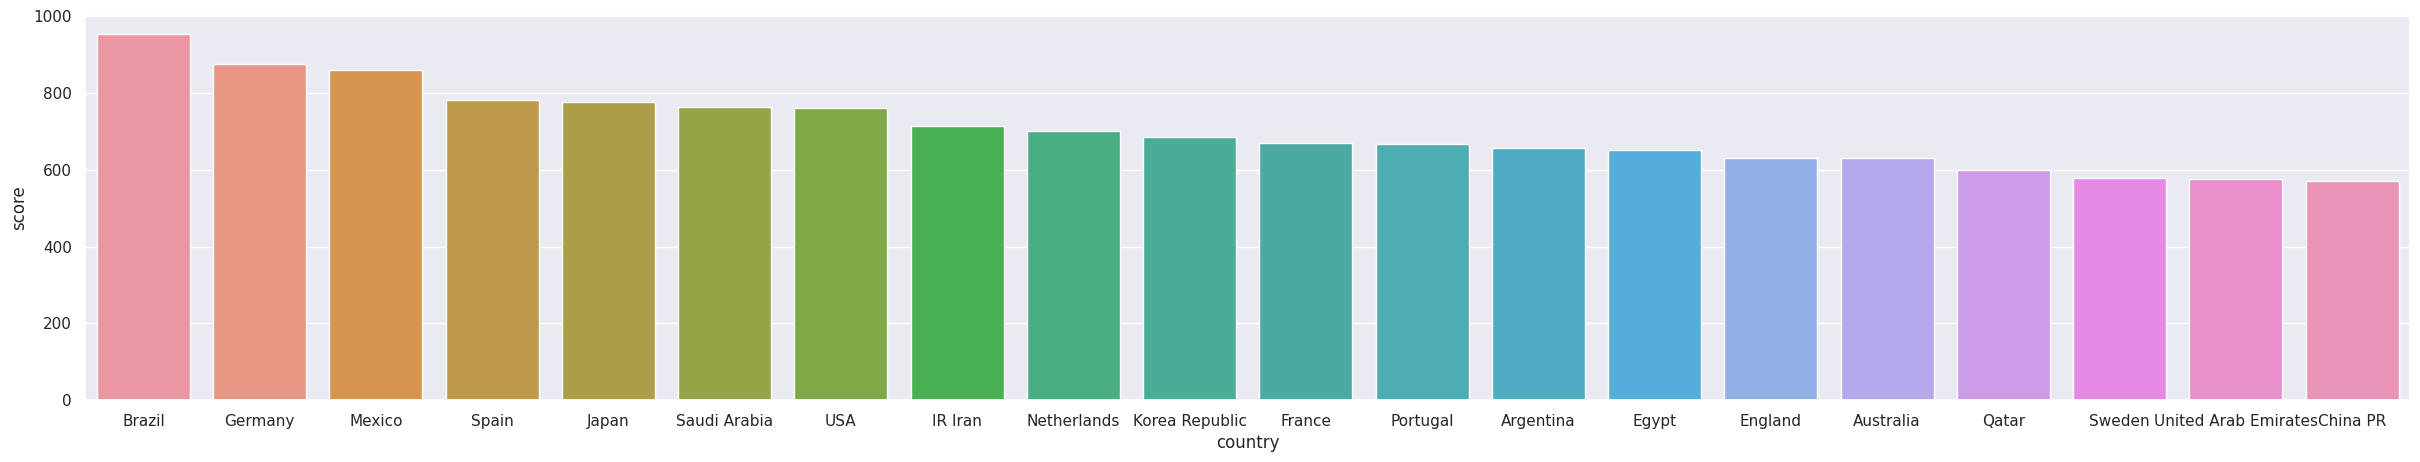

In [25]:
home_team_score = pd.DataFrame(matches_df[['home_team', 'home_team_score']].dropna().values, columns=['country', 'score'])
away_team_score = pd.DataFrame(matches_df[['away_team', 'away_team_score']].dropna().values, columns=['country', 'score'])
countries_score = pd.concat([home_team_score, away_team_score])
countries_score = countries_score.groupby(countries_score['country'], as_index=False).aggregate('sum').sort_values(by='score', ascending=False)
countries_score = countries_score.head(20)
sns.set(rc={'figure.figsize':(30,5)})
sns.barplot(data=countries_score, x=countries_score['country'], y=countries_score['score'])

### Drzave koje su pobijedile unatoc velikoj razlici u Fifa Scoreu (Upsetovi)

[Text(0.5, 0, 'Fifa points'), Text(0, 0.5, 'Match name')]

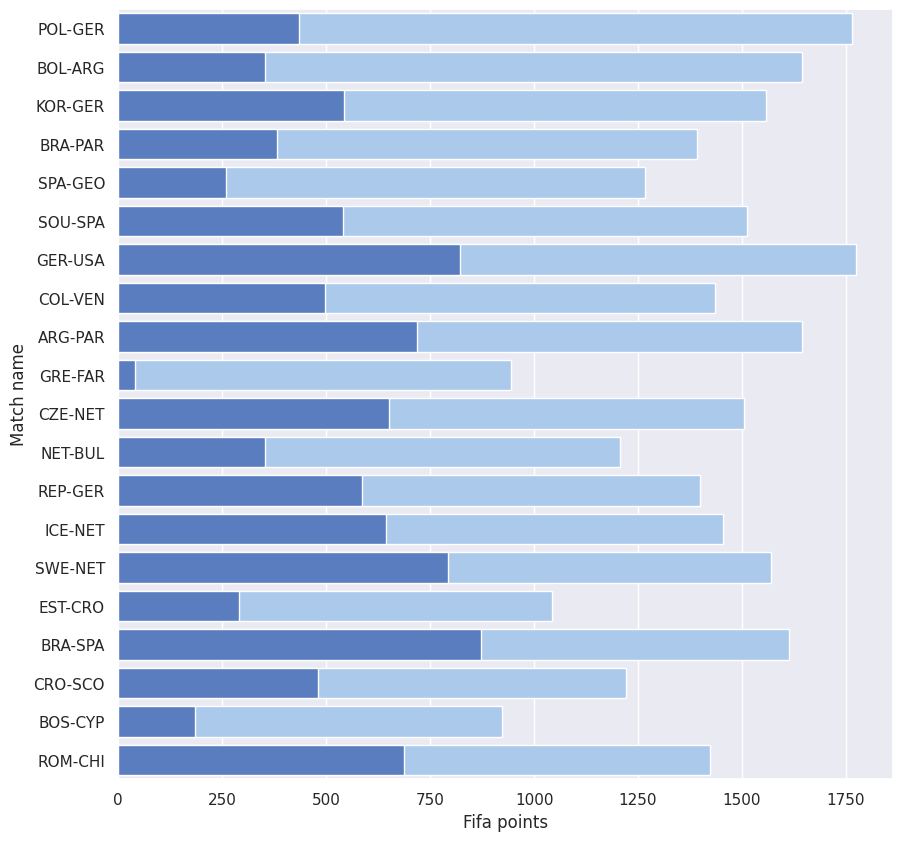

In [27]:
upset_matches = pd.DataFrame(matches_df[['home_team', 'away_team', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'home_team_result', 'tournament']])
upset_matches['fifa_score_difference'] = upset_matches.apply(lambda x: abs(x['home_team_total_fifa_points'] - x['away_team_total_fifa_points']), axis=1)
upset_matches['match_name'] = upset_matches.apply(lambda x: x['home_team'][:3].upper() + '-' + x["away_team"][:3].upper(), axis=1)

upset_matches['weaker_team_fifa_points'] = upset_matches.apply(lambda x: x['home_team_total_fifa_points'] if(x['home_team_total_fifa_points'] - x['away_team_total_fifa_points'] < 0) else x['away_team_total_fifa_points'] , axis=1)
upset_matches['stronger_team_fifa_points'] = upset_matches.apply(lambda x: x['home_team_total_fifa_points'] if(x['home_team_total_fifa_points'] - x['away_team_total_fifa_points'] > 0) else x['away_team_total_fifa_points'] , axis=1)

upset_matches = upset_matches[upset_matches['fifa_score_difference'] > 10].sort_values(by='fifa_score_difference', ascending=False)
upset_matches = upset_matches[((upset_matches['home_team_total_fifa_points'] - upset_matches['away_team_total_fifa_points'] < 0) & (upset_matches['home_team_result'] == 'Win')) | ((upset_matches['home_team_total_fifa_points'] - upset_matches['away_team_total_fifa_points'] > 0) & (upset_matches['home_team_result'] == 'Lose'))]
upset_matches_graph = upset_matches.head(20)

sns.set(rc={'figure.figsize':(10,10)})

sns.set_color_codes("pastel")
graph = sns.barplot(x='stronger_team_fifa_points', y="match_name", data=upset_matches_graph, color="b")

sns.set_color_codes("muted")
graph = sns.barplot(x='weaker_team_fifa_points', y="match_name", data=upset_matches_graph, color="b")

graph.set(xlabel="Fifa points", ylabel="Match name")

### Natjecanje sa najvise upsetova

[Text(0.5, 0, 'Number of upsets'), Text(0, 0.5, 'Tournament name')]

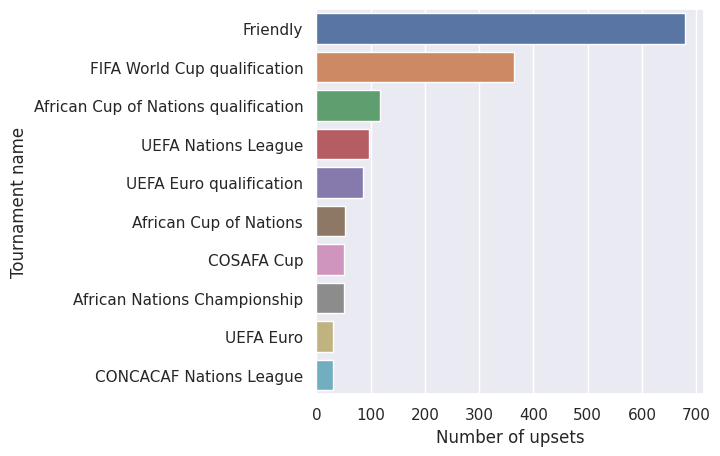

In [28]:
aggregated = upset_matches.groupby('tournament').aggregate('size').sort_values(ascending=False)
aggregated = pd.DataFrame({'tournament': aggregated.index, 'number_of_upsets': aggregated.values})
aggregated = aggregated.head(10)
sns.set(rc={'figure.figsize':(5,5)})
graph = sns.barplot(data=aggregated, y=aggregated['tournament'], x=aggregated['number_of_upsets'], orient='h')
graph.set(xlabel="Number of upsets", ylabel="Tournament name")

### Prosjecni rating napade, obrane, veznog reda i golmana Hrvatske kroz godine

/tmp/ipykernel_5585/3412221316.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_with_croatia_as_home_team["year"] = pd.DatetimeIndex(matches_with_croatia_as_home_team["date"]).year
/tmp/ipykernel_5585/3412221316.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_with_croatia_as_away_team["year"] = pd.DatetimeIndex(matches_with_croatia_as_away_team["date"]).year
/tmp/ipykernel_5585/3412221316.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyw

Text(0.5, 0, 'YEAR')

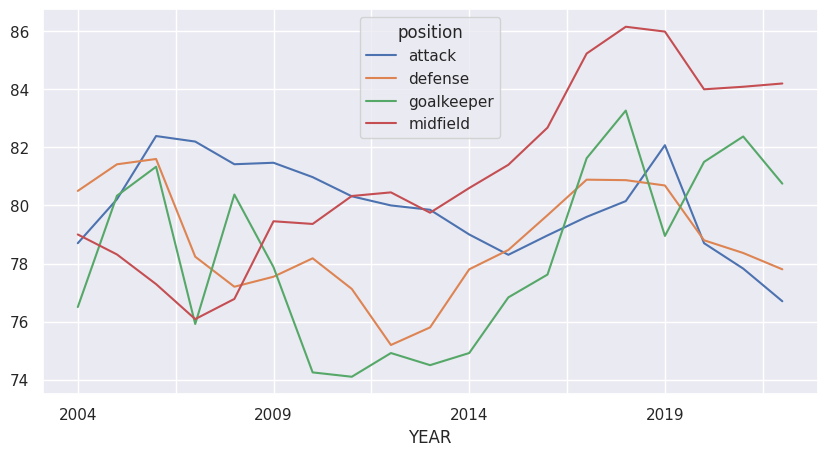

In [4]:
matches_with_croatia_as_home_team = matches_df.loc[matches_df["home_team"] == "Croatia"]
matches_with_croatia_as_away_team = matches_df.loc[matches_df["away_team"] == "Croatia"]

matches_with_croatia_as_home_team["year"] = pd.DatetimeIndex(matches_with_croatia_as_home_team["date"]).year
matches_with_croatia_as_away_team["year"] = pd.DatetimeIndex(matches_with_croatia_as_away_team["date"]).year

croatia_mean_rating_of_attack = pd.DataFrame(pd.concat([matches_with_croatia_as_home_team.groupby('year')["home_team_mean_offense_score"].mean().dropna(), matches_with_croatia_as_away_team.groupby('year')["away_team_mean_offense_score"].mean().dropna()]).groupby('year').mean()).iloc[:, -1].values
croatia_mean_rating_of_defense = pd.DataFrame(pd.concat([matches_with_croatia_as_home_team.groupby('year')["home_team_mean_defense_score"].mean().dropna(), matches_with_croatia_as_away_team.groupby('year')["away_team_mean_defense_score"].mean().dropna()]).groupby('year').mean()).iloc[:, -1].values
croatia_mean_rating_of_midfield = pd.DataFrame(pd.concat([matches_with_croatia_as_home_team.groupby('year')["home_team_mean_midfield_score"].mean().dropna(), matches_with_croatia_as_away_team.groupby('year')["away_team_mean_midfield_score"].mean().dropna()]).groupby('year').mean()).iloc[:, -1].values
croatia_mean_rating_of_goalkeeper = pd.DataFrame(pd.concat([matches_with_croatia_as_home_team.groupby('year')["home_team_goalkeeper_score"].mean().dropna(), matches_with_croatia_as_home_team.groupby('year')["away_team_goalkeeper_score"].mean().dropna()]).groupby('year').mean()).iloc[:, -1].values

years = np.tile(['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], 4)
score = np.concatenate((croatia_mean_rating_of_attack, croatia_mean_rating_of_defense, croatia_mean_rating_of_midfield, croatia_mean_rating_of_goalkeeper))
position = np.concatenate((np.tile('attack', int(len(years)/4)), np.tile('defense', int(len(years)/4)), np.tile('midfield', int(len(years)/4)), np.tile('goalkeeper', int(len(years)/4))))

croatia_overall_score_through_years_df = pd.DataFrame({'year': years, 'rate': np.array(score, dtype=float), 'position': position})
croatia_overall_score_through_years_df = croatia_overall_score_through_years_df.pivot("year", "position", "rate")
sns.set(rc={"figure.figsize": [10,5]})
ax = croatia_overall_score_through_years_df.plot()
ax.set_xlabel("SCORE")
ax.set_xlabel("YEAR")

### Korelacija kvalitete specificne statistike

<AxesSubplot: xlabel='fifa_points', ylabel='score'>

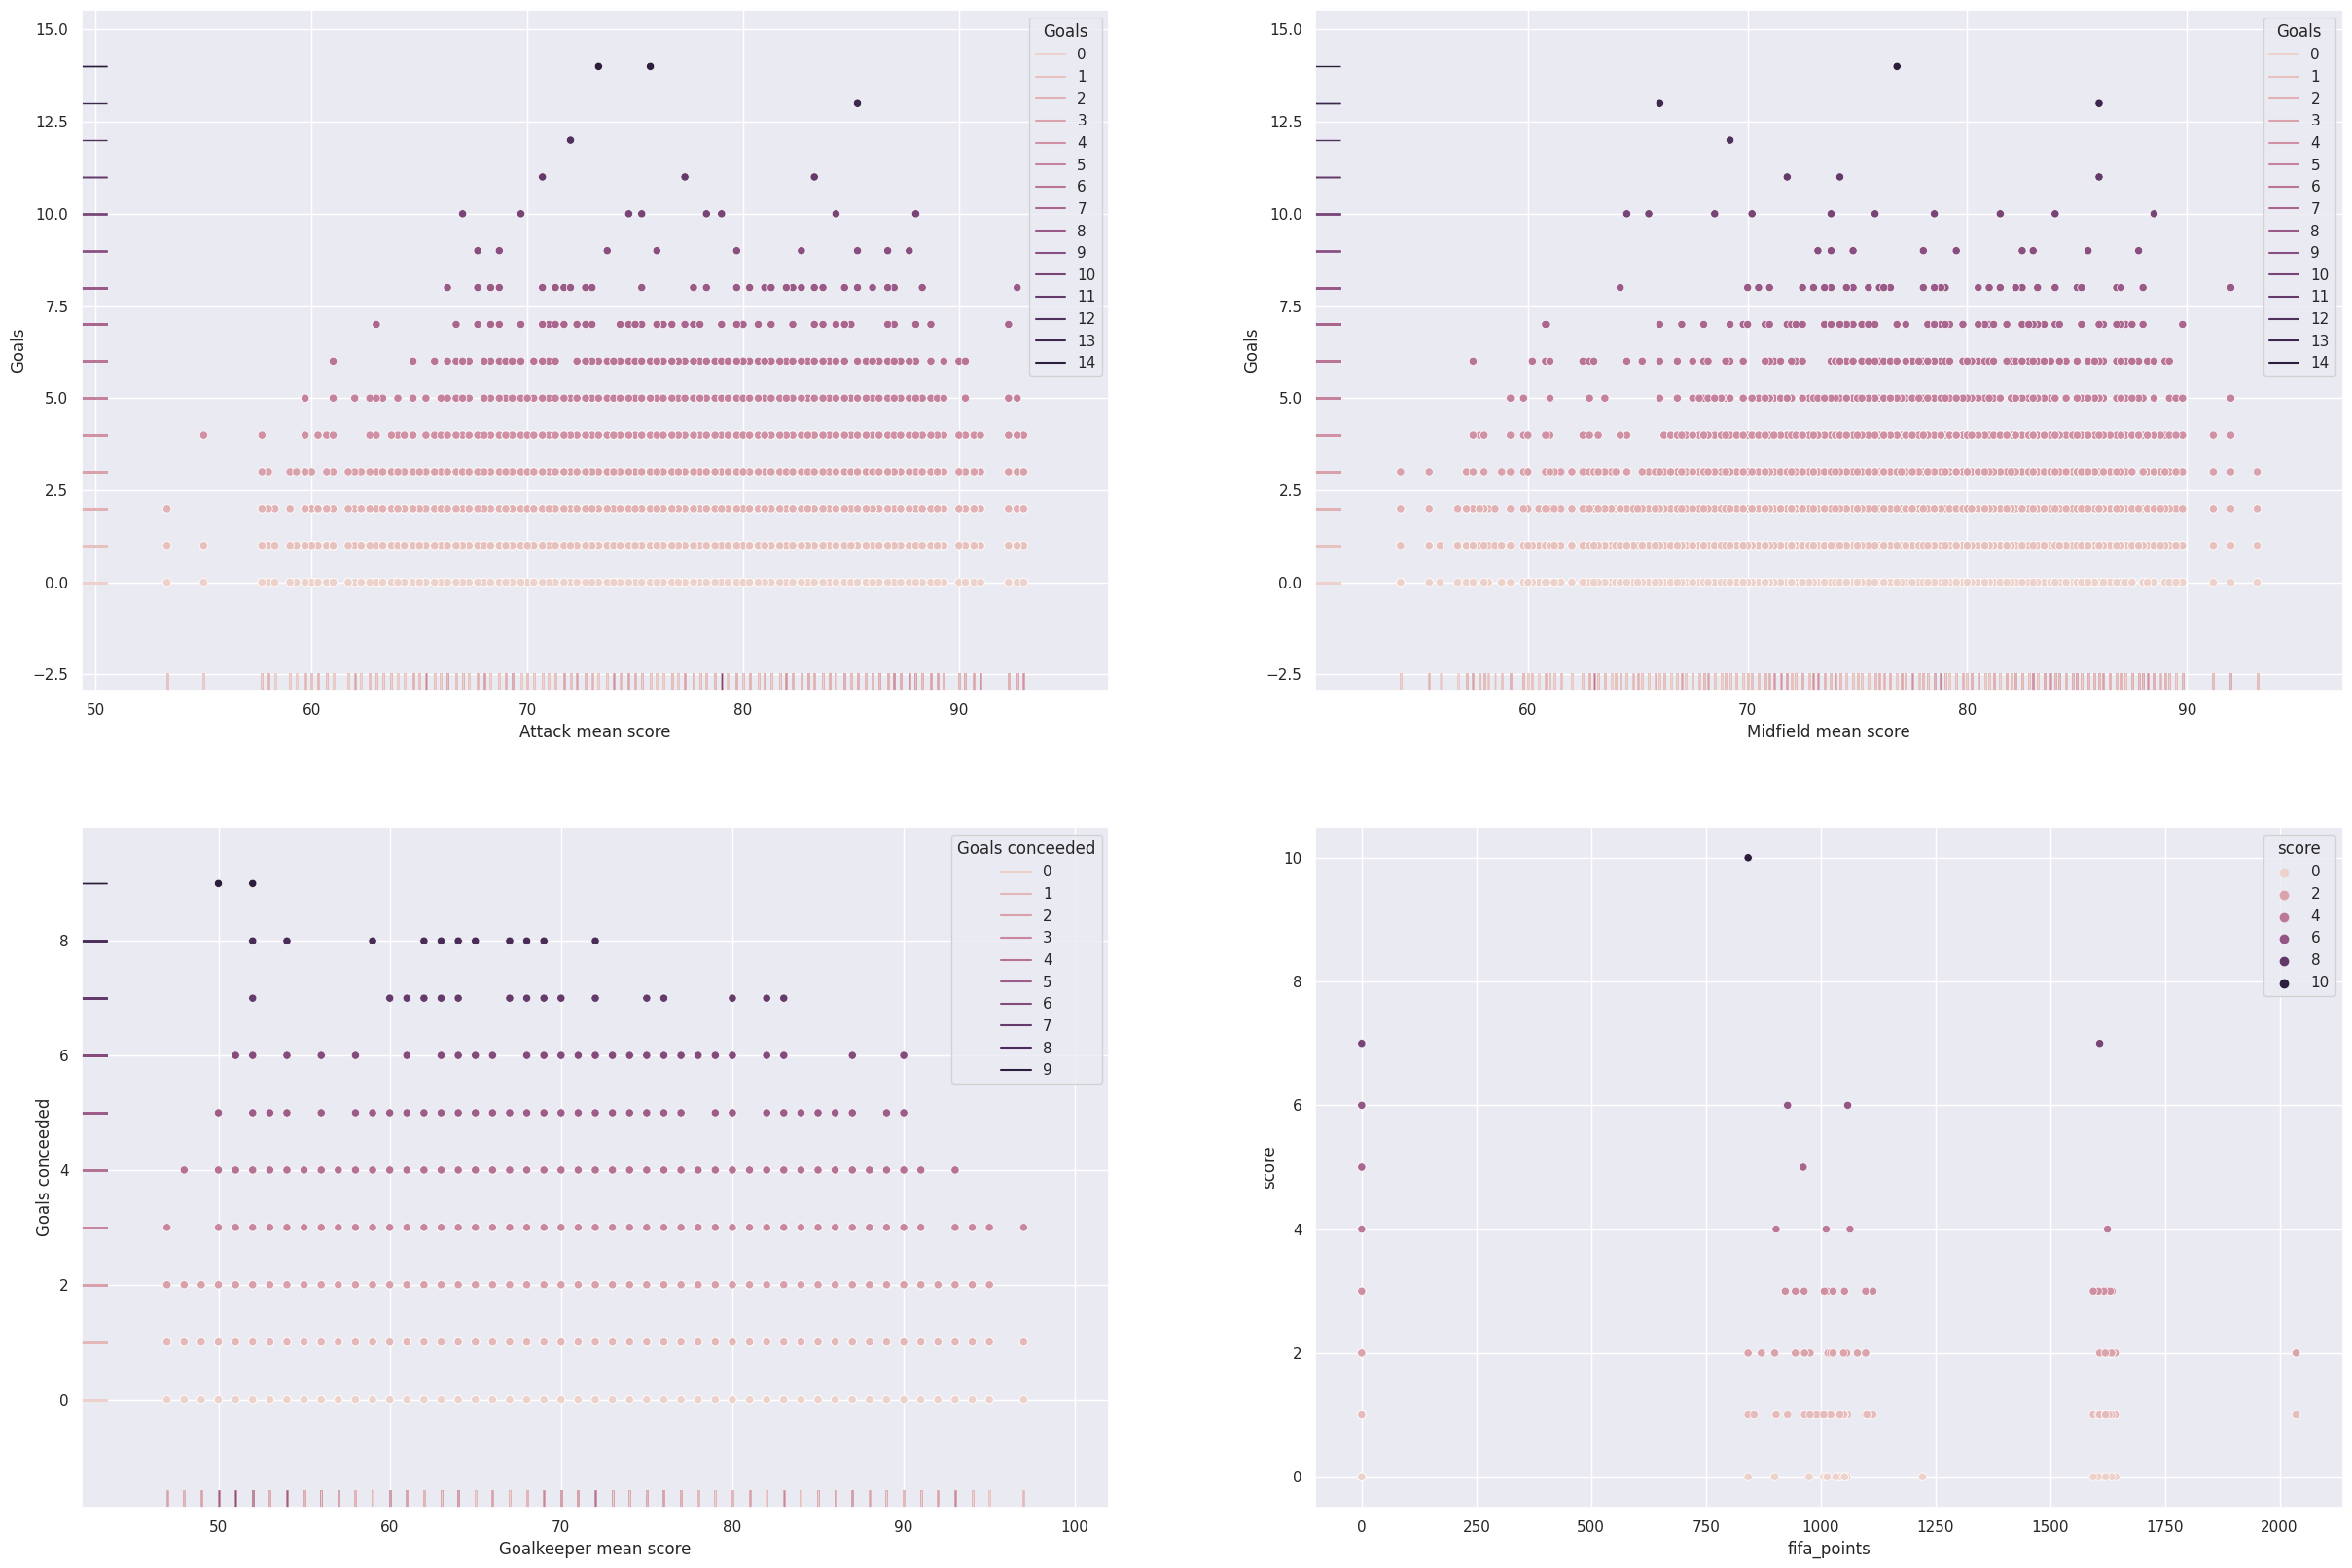

In [16]:
correl_goalkeeper_home = matches_df[["home_team_goalkeeper_score", "away_team_score"]].rename(columns={"home_team_goalkeeper_score": "score", "away_team_score": "goals_conceeded"})
correl_goalkeeper_away = matches_df[["away_team_goalkeeper_score", "home_team_score"]].rename(columns={"away_team_goalkeeper_score": "score", "home_team_score": "goals_conceeded"})
correl_goalkeeper = pd.DataFrame(pd.concat([correl_goalkeeper_home, correl_goalkeeper_away])).dropna().rename(columns={"score": "Goalkeeper mean score", "goals_conceeded": "Goals conceeded"})

correl_ho_mf = matches_df[["home_team_mean_midfield_score", "home_team_score"]].rename(columns={"home_team_mean_midfield_score": "score", "home_team_score": "goals"})
correl_aw_mf = matches_df[["away_team_mean_midfield_score", "away_team_score"]].rename(columns={"away_team_mean_midfield_score": "score", "away_team_score": "goals"})
correl_mf = pd.DataFrame(pd.concat([correl_ho_mf, correl_aw_mf])).dropna().rename(columns={"score": "Midfield mean score", "goals": "Goals"})

correl_ho_of = matches_df[["home_team_mean_offense_score", "home_team_score"]].rename(columns={"home_team_mean_offense_score": "score", "home_team_score": "goals"})
correl_aw_of = matches_df[["away_team_mean_offense_score", "away_team_score"]].rename(columns={"away_team_mean_offense_score": "score", "away_team_score": "goals"})
correl_of = pd.DataFrame(pd.concat([correl_ho_of, correl_aw_of])).dropna().rename(columns={"score": "Attack mean score", "goals": "Goals"})

croatia_home_matches = matches_df.loc[matches_df['home_team'] == 'Croatia']
croatia_away_matches = matches_df.loc[matches_df['away_team'] == 'Croatia']

croatia_home_matches = pd.DataFrame(croatia_home_matches[['home_team', 'home_team_score', 'home_team_total_fifa_points']].dropna().values, columns=['country', 'score', 'fifa_points'])
croatia_away_matches = pd.DataFrame(croatia_away_matches[['away_team', 'away_team_score', 'away_team_total_fifa_points']].dropna().values, columns=['country', 'score', 'fifa_points'])

croatia_matches = pd.concat([croatia_away_matches, croatia_home_matches])

figure, axes = plt.subplots(2, 2, figsize=(30,20))

sns.scatterplot(data=correl_of, x="Attack mean score", y="Goals", hue="Goals", ax=axes[0][0])
sns.rugplot(data=correl_of, x="Attack mean score", y="Goals", hue="Goals", ax=axes[0][0])

sns.scatterplot(data=correl_mf, x="Midfield mean score", y="Goals", hue="Goals", ax=axes[0][1])
sns.rugplot(data=correl_mf, x="Midfield mean score", y="Goals", hue="Goals", ax=axes[0][1])

sns.scatterplot(data=correl_goalkeeper, x="Goalkeeper mean score", y="Goals conceeded", hue="Goals conceeded", ax=axes[1][0])
sns.rugplot(data=correl_goalkeeper, x="Goalkeeper mean score", y="Goals conceeded", hue="Goals conceeded", ax=axes[1][0])

sns.scatterplot(data=croatia_matches, x="fifa_points", y="score", hue="score", ax=axes[1][1])


### Broj utakmica koje su završile raspucavanjem jedanaesteraca



/tmp/ipykernel_5585/3648214798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_with_penalty_shootout["year"] = pd.DatetimeIndex(matches_with_penalty_shootout["date"]).year


<AxesSubplot: xlabel='year'>

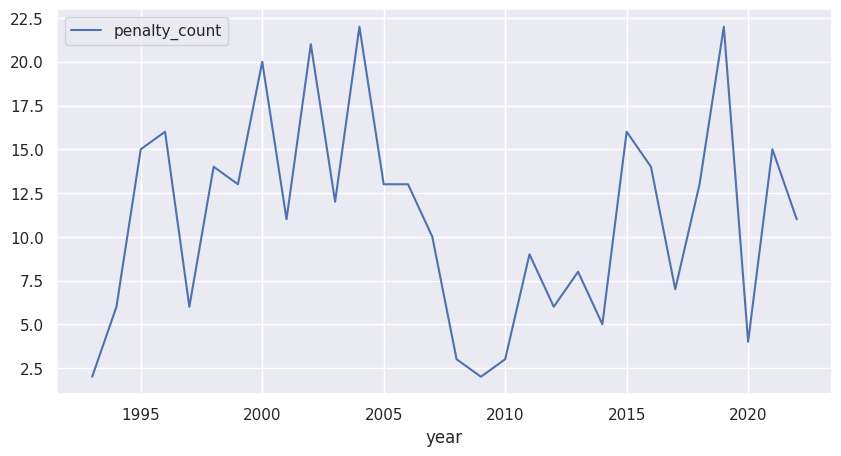

In [6]:
matches_with_penalty_shootout = matches_df.loc[matches_df["shoot_out"] == "Yes"]
matches_with_penalty_shootout["year"] = pd.DatetimeIndex(matches_with_penalty_shootout["date"]).year
matches_with_penalty_shootout = matches_with_penalty_shootout.groupby('year').size().reset_index(name="penalty_count")
matches_with_penalty_shootout.plot(x="year", y="penalty_count")

### Distribucija pobjede kod kuce i u gostima

<AxesSubplot: xlabel='year'>

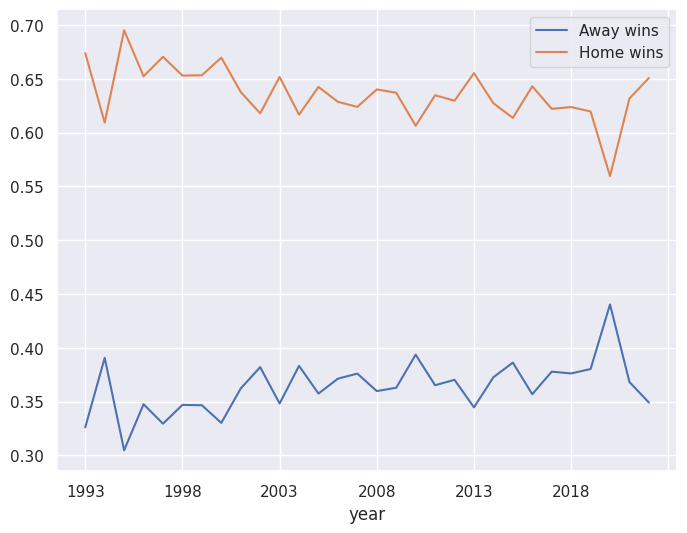

In [13]:
matches_df_outcomes = matches_df.copy()
matches_df_outcomes['date'] = pd.to_datetime(matches_df_outcomes['date'], format='%Y-%m-%d')
matches_df_outcomes['year'] = matches_df_outcomes['date'].dt.strftime('%Y')

matches_home_wins_df = matches_df_outcomes[matches_df_outcomes["home_team_score"] > matches_df_outcomes["away_team_score"]]
matches_home_wins_df = matches_home_wins_df.groupby(by="year").size().reset_index(name="count_home")

matches_away_wins_df = matches_df_outcomes[matches_df_outcomes["home_team_score"] < matches_df_outcomes["away_team_score"]]
matches_away_wins_df = matches_away_wins_df.groupby(by="year").size().reset_index(name="count_away")

matches_outcomes = pd.DataFrame(pd.concat([matches_away_wins_df, matches_home_wins_df]).groupby(by="year").aggregate("sum"))
matches_outcomes["total"] = matches_outcomes["count_away"] + matches_outcomes["count_home"]
matches_outcomes["count_away"] = matches_outcomes["count_away"]/matches_outcomes["total"]
matches_outcomes["count_home"] = matches_outcomes["count_home"]/matches_outcomes["total"]
matches_outcomes = matches_outcomes.drop("total", axis=1).rename(columns={"count_away": "Away wins", "count_home": "Home wins"})
sns.set(rc={'figure.figsize':(8,6)})
matches_outcomes.plot(kind="line")

### Ucestalost istih rezultata

/tmp/ipykernel_5585/2329937932.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivoted = goals_df.pivot("Away Team Score", "Home Team Score", "matches")


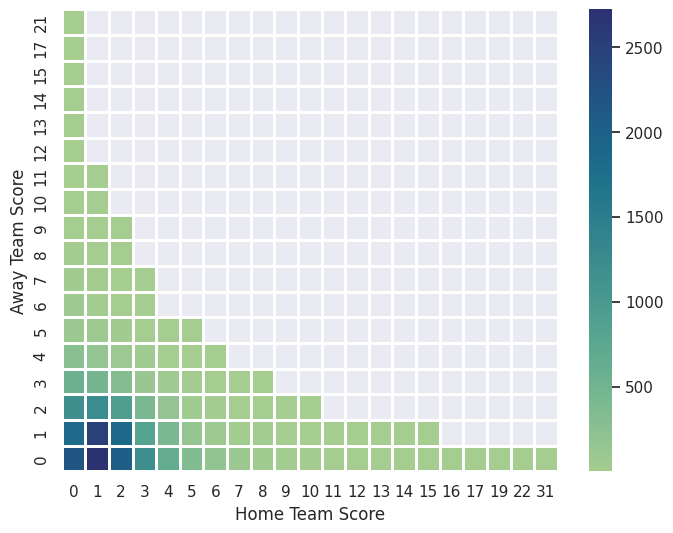

In [14]:
goals_df = matches_df[["home_team_score", "away_team_score"]].groupby(by=["home_team_score", "away_team_score"]).size().reset_index(name="matches").sort_values(by="matches")
goals_df = goals_df.rename(columns={
    "home_team_score": "Home Team Score",
    "away_team_score": "Away Team Score",
})
pivoted = goals_df.pivot("Away Team Score", "Home Team Score", "matches")
sns.set(rc={'figure.figsize':(8,6)})
hmap = sns.heatmap(pivoted, linewidth=2, cmap="crest")
hmap.invert_yaxis()

### Broj utakmica u godini

/tmp/ipykernel_5585/1233447032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_matches_df['date'] = pd.to_datetime(new_matches_df.date)


<AxesSubplot: >

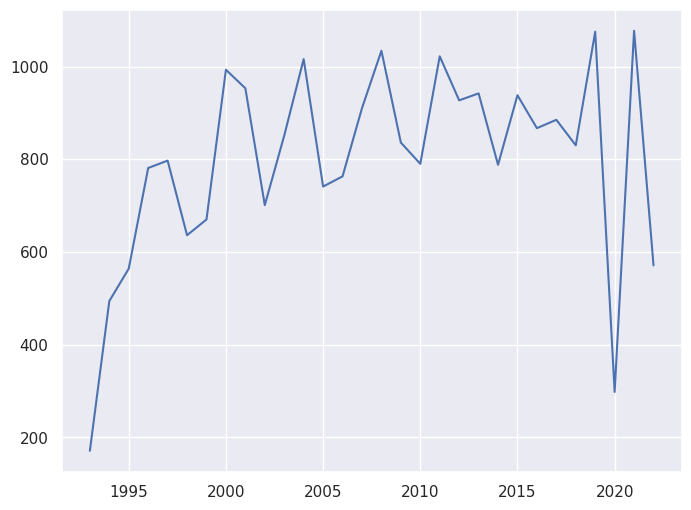

In [15]:
new_matches_df = matches_df[["date"]]
new_matches_df['date'] = pd.to_datetime(new_matches_df.date)
new_matches_df.date.dt.year.value_counts().sort_index().plot()